In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [3]:
print(spark.sparkContext)
print("Spark App Name : "+ spark.sparkContext.appName)

<SparkContext master=local[*] appName=pyspark-shell>
Spark App Name : pyspark-shell


In [4]:
#
# SparkContext stop() method
spark.sparkContext.stop()


In [5]:

# Create SparkContext
from pyspark import SparkContext
sc = SparkContext("local", "ALY6110_App")
print(sc.appName)


ALY6110_App


In [6]:
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd

In [7]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [8]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("ALY6110_App").getOrCreate()

dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [9]:
#Combine Column to Single Vector using VectorAssembler

In [10]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

only_features = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']

assembler = VectorAssembler(inputCols=only_features, outputCol="features")

feat_df = assembler.transform(dataset).select('features')

feat_df.show(6)


+--------------------+
|            features|
+--------------------+
|[0.00632,18.0,2.3...|
|[0.02731,0.0,7.07...|
|[0.02729,0.0,7.07...|
|[0.03237,0.0,2.18...|
|[0.06905,0.0,2.18...|
|[0.02985,0.0,2.18...|
+--------------------+
only showing top 6 rows



In [11]:
from pyspark.ml.feature import StandardScaler
#Standardize the data

scalar = StandardScaler(
    inputCol = 'features',
    outputCol = 'scaledFeatures',
    withMean = True,
    withStd = True
).fit(feat_df)

df_scaled = scalar.transform(feat_df)
df_scaled.show(5)

+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[0.00632,18.0,2.3...|[-0.4193669292132...|
|[0.02731,0.0,7.07...|[-0.4169266699640...|
|[0.02729,0.0,7.07...|[-0.4169289951277...|
|[0.03237,0.0,2.18...|[-0.4163384035610...|
|[0.06905,0.0,2.18...|[-0.4120740534296...|
+--------------------+--------------------+
only showing top 5 rows



In [12]:
#Train model for two principal component analysis
from pyspark.ml.feature import PCA

n_comp = 2
pca = PCA(
    k =n_comp,
    inputCol = 'scaledFeatures',
    outputCol = 'pcaFeatures'
).fit(df_scaled)

df_pca = pca.transform(df_scaled)
print('Explained Variance Ration',pca.explainedVariance.toArray())
df_pca.show(5)


Explained Variance Ration [0.47129606 0.11025193]
+--------------------+--------------------+--------------------+
|            features|      scaledFeatures|         pcaFeatures|
+--------------------+--------------------+--------------------+
|[0.00632,18.0,2.3...|[-0.4193669292132...|[2.09622303023858...|
|[0.02731,0.0,7.07...|[-0.4169266699640...|[1.45581098944742...|
|[0.02729,0.0,7.07...|[-0.4169289951277...|[2.07254655194818...|
|[0.03237,0.0,2.18...|[-0.4163384035610...|[2.60892175886434...|
|[0.06905,0.0,2.18...|[-0.4120740534296...|[2.45575477193107...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [13]:
#Collect distributed data in numpy array and then convert to pandas dataframe

X_pca = df_pca.rdd.map(lambda row: row.pcaFeatures).collect()
X_pca = np.array(X_pca)
X_pca

array([[2.09622303, 0.77234843],
       [1.45581099, 0.59139995],
       [2.07254655, 0.59904658],
       ...,
       [0.31205166, 1.15410433],
       [0.27025162, 1.04033206],
       [0.12567884, 0.76122473]])

In [14]:
#Convert Array to DataFrame

df_pca = pd.DataFrame(X_pca,columns = ['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,2.096223,0.772348
1,1.455811,0.591400
2,2.072547,0.599047
3,2.608922,-0.006864
4,2.455755,0.097615


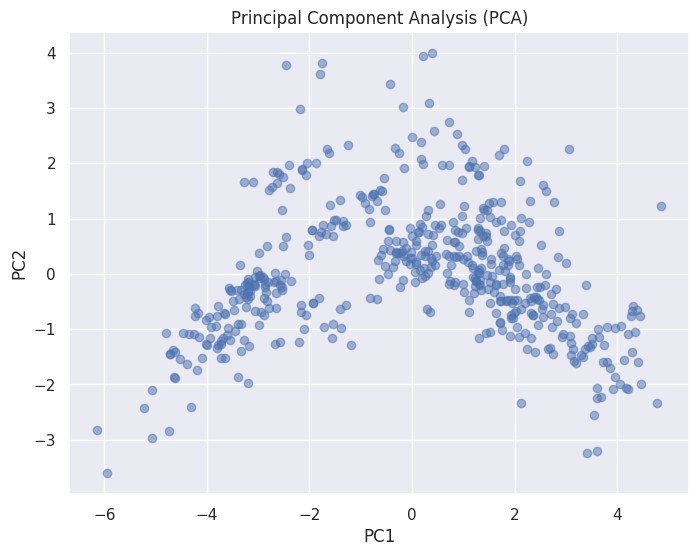

In [15]:
#Plot two principal components
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis (PCA)')

# Show the plot
plt.show()


In [16]:
#Vectorize features and target together for model development


# Use the VectorAssembler to transform your DataFrame
assembled_df = assembler.transform(dataset)

# Select the relevant columns (features and target)
assembled_df = assembled_df.select("features", "medv")

# Show the resulting DataFrame
assembled_df.show()

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [17]:
#Split dataset into training and testing dataset

train_data,test_data = assembled_df.randomSplit([0.7,0.3])

In [18]:
#Fit model for linear regression
from pyspark.ml.regression import LinearRegression

lin_reg = LinearRegression(featuresCol = 'features',labelCol = 'medv')

#Fit the model from train set
lin_reg = lin_reg.fit(train_data)

In [19]:
#Find out model coefficients and intercept

# Get the coefficients and intercept
coefficients = lin_reg.coefficients
intercept = lin_reg.intercept

print("Coefficients: " + str(coefficients))
print("Intercept: " + str(intercept))


Coefficients: [-0.09996615270102485,0.048523592899323134,-0.021216996768955748,0.9190077500644355,-19.253634867312222,2.766453143992886,0.027440185185167953,-1.3886112373165074,0.2920284309577658,-0.010383500235497155,-0.993232364604942,0.006770901889994791,-0.630698720313581]
Intercept: 44.209669466932155


In [20]:
#Evaluate model for test dataset

from pyspark.ml.evaluation import RegressionEvaluator
pred = lin_reg.evaluate(test_data)

# Predcit Model
pred.predictions.show()

+--------------------+----+------------------+
|            features|medv|        prediction|
+--------------------+----+------------------+
|[0.00632,18.0,2.3...|24.0|30.542653582858588|
|[0.01301,35.0,1.5...|32.7|30.134342080727386|
|[0.01311,90.0,1.2...|35.4| 30.35089920967257|
|[0.01501,80.0,2.0...|24.5|27.500811532166956|
|[0.01501,90.0,1.2...|50.0| 41.58822204398309|
|[0.01709,90.0,2.0...|30.1| 25.80100315758348|
|[0.01778,95.0,1.4...|32.9| 30.13211036102954|
|[0.02009,95.0,2.6...|50.0|41.812874936411895|
|[0.02055,85.0,0.7...|24.7|25.501650835446515|
|[0.02187,60.0,2.9...|31.1| 31.31998925368163|
|[0.02729,0.0,7.07...|34.7| 30.19298400976699|
|[0.02731,0.0,7.07...|21.6|25.372534214619243|
|[0.02763,75.0,2.9...|30.8| 30.92340177794531|
|[0.02899,40.0,1.2...|26.6|21.967379364060942|
|[0.03041,0.0,5.19...|18.5|19.411501175368787|
|[0.03049,55.0,3.7...|31.2|28.142943762821048|
|[0.03306,0.0,5.19...|20.6|21.669733228523945|
|[0.03359,75.0,2.9...|34.9|33.420740563852036|
|[0.03537,34.

In [21]:
from pyspark.ml.evaluation import RegressionEvaluator
#Evaluate model for test dataset

eval = RegressionEvaluator(labelCol="medv",predictionCol= "prediction", metricName= "rmse")

#RMSE
rmse = eval.evaluate(pred.predictions)
print("Rmse: %.3f" % rmse)

#MSE
mse = eval.evaluate(pred.predictions,{eval.metricName:"mse"})
print("MSE: %.3f" % mse)

#MAE
mae = eval.evaluate(pred.predictions,{eval.metricName:"mae"})
print("MAE: %.3f" % mae)

#R2
r2 = eval.evaluate(pred.predictions,{eval.metricName:"r2"})
print("R2: %.3f" % r2)

Rmse: 5.152
MSE: 26.543
MAE: 3.563
R2: 0.721


In [22]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator

In [23]:
regressorRF = RandomForestRegressor(featuresCol = "features", labelCol = "medv")
pipeline = Pipeline(stages=[assembler, regressorRF])

In [24]:
pipeline.write().overwrite().save("pipeline")

In [25]:
#Hyperparameter Tuning

In [26]:
pipelineModel = Pipeline.load("pipeline")
paramGrid = ParamGridBuilder().addGrid(regressorRF.numTrees, [100, 500]).build()

In [27]:
eval = RegressionEvaluator(labelCol = "med", predictionCol = "prediction", metricName="rmse")

In [28]:
crossval = CrossValidator(estimator = pipelineModel, estimatorParamMaps = paramGrid, evaluator = RegressionEvaluator(labelCol = "medv"), numFolds = 5)

In [29]:
train_data,test_data = dataset.randomSplit([0.8,0.2],seed=123)

In [30]:
cvModel = crossval.fit(train_data)

In [31]:
bestModel = cvModel.bestModel
for x in range(len(bestModel.stages)):
  print(bestModel.stages[x])

VectorAssembler_560a274234fe
RandomForestRegressionModel: uid=RandomForestRegressor_6c5f835dd8b7, numTrees=500, numFeatures=13


In [32]:
test_data = assembler.transform(test_data).select("features", "medv")

# Make predictions
predictions = lin_reg.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("RMSE: %.3f" % rmse)

# MSE
mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
print("MSE: %.3f" % mse)

# MAE
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
print("MAE: %.3f" % mae)

# R2
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
print("R2: %.3f" % r2)


RMSE: 3.814
MSE: 14.543
MAE: 2.905
R2: 0.816
